In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import re
import os

from collections import namedtuple
Img = namedtuple('Img', ['path', 'tags'])

In [2]:
%matplotlib notebook

In [25]:
experiments_folder = "../Experiments/Stackelberg_UnknownStochastic/"
images = []
img_pattern = re.compile("^plot$")
for root, dirs, files in os.walk(experiments_folder):
    for f in files:
        if img_pattern.match(f):
            images.append(Img(os.path.join(root, f), root.split(experiments_folder)[1].split('/')))

In [4]:
images

[Img(path='../Experiments/Stackelberg_UnknownStochastic/t4/p1/br_mab1-1_br_expert1-1/plot', tags=['t4', 'p1', 'br_mab1-1_br_expert1-1']),
 Img(path='../Experiments/Stackelberg_UnknownStochastic/t2/p1/br_mab1-1_br_expert1-1/plot', tags=['t2', 'p1', 'br_mab1-1_br_expert1-1'])]

In [37]:
def find_images(tags):
    return [i.path for i in images if set(tags).issubset(set(i.tags))]

discarded_collections = []
discarded_lines = []

def restore():
    global discarded_collections
    global discarded_lines
    fig.axes[0].lines += discarded_lines
    fig.axes[0].collections += discarded_collections
    discarded_lines = []
    discarded_collections = []
    plt.draw()

def select(selected):
    global discarded_collections
    global discarded_lines
    restore()
    for i,l in enumerate(fig.axes[0].lines):
        if l._label not in selected:
            discarded_lines.append(fig.axes[0].lines.pop(i))
            discarded_collections.append(fig.axes[0].collections.pop(i))
    plt.draw()

In [6]:
find_images(['t4', 'p1'])[0]

'../Experiments/Stackelberg_UnknownStochastic/t4/p1/br_mab1-1_br_expert1-1/plot'

<IPython.core.display.Javascript object>


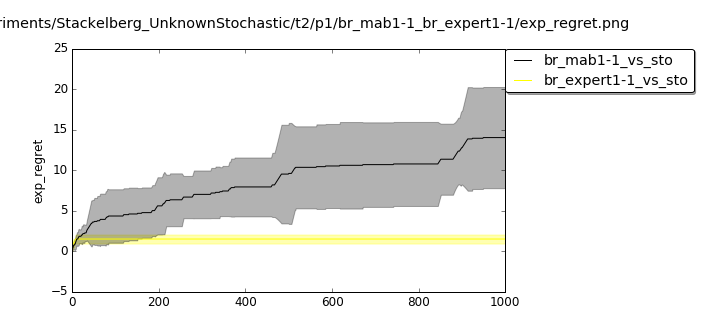

['br_mab1-1_vs_sto', 'br_expert1-1_vs_sto']


In [45]:
with open(find_images(['t2', 'p1'])[0], mode='r+b') as file:
    fig = pickle.load(file)
print([l._label for l in fig.axes[0].lines])

In [50]:
select(['br_mab1-1_vs_sto', 'br_expert1-1_vs_sto'])

In [16]:
plt.close(fig)

In [31]:
fig.axes[0].collections.append(col)
plt.draw()

In [34]:
fig.axes[0].collections[0].__dict__

{'_A': None,
 '_agg_filter': None,
 '_alpha': 0.3,
 '_animated': False,
 '_antialiaseds': (True,),
 '_axes': <matplotlib.axes._axes.Axes at 0x7fea30a83c88>,
 '_clipon': True,
 '_clippath': None,
 '_contains': None,
 '_edgecolors': array([[ 1. ,  1. ,  0. ,  0.3]]),
 '_edgecolors_original': (1.0, 1.0, 0.0, 1.0),
 '_facecolors': array([[ 1. ,  1. ,  0. ,  0.3]]),
 '_facecolors_original': (1.0, 1.0, 0.0, 1.0),
 '_gid': None,
 '_hatch': None,
 '_is_filled': True,
 '_is_stroked': True,
 '_label': '_collection1',
 '_linestyles': [(None, None)],
 '_linewidths': (1.0,),
 '_mouseover': False,
 '_offset_position': 'screen',
 '_offsets': array([[ 0.,  0.]]),
 '_oid': 0,
 '_path_effects': None,
 '_paths': [Path(array([[ 0.        , -0.03008694],
         [ 0.        ,  0.52258939],
         [ 1.        ,  1.07428221],
         ..., 
         [ 1.        ,  0.23628717],
         [ 0.        , -0.03008694],
         [ 0.        , -0.03008694]]), array([ 1,  2,  2, ...,  2,  2, 79], dtype=uint8))],
 